In [ ]:
# Titanic EDA Project
# Tools: Python, Pandas, Seaborn, Matplotlib

# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Step 2: Load Dataset
# You can load it directly from seaborn
df = sns.load_dataset("titanic")

# If downloading from Kaggle, use: df = pd.read_csv("titanic.csv")

# Step 3: Basic Data Overview
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# Step 4: Data Cleaning
# Drop columns not needed
df = df.drop(columns=["deck", "embark_town", "alive", "class", "who", "adult_male"])

# Fill missing age with median
df["age"].fillna(df["age"].median(), inplace=True)

# Fill embarked with mode
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

# Step 5: Exploratory Data Analysis (EDA)

print(df)

First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   

/tmp/ipython-input-2-1767892112.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
/tmp/ipython-input-2-1767892112.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

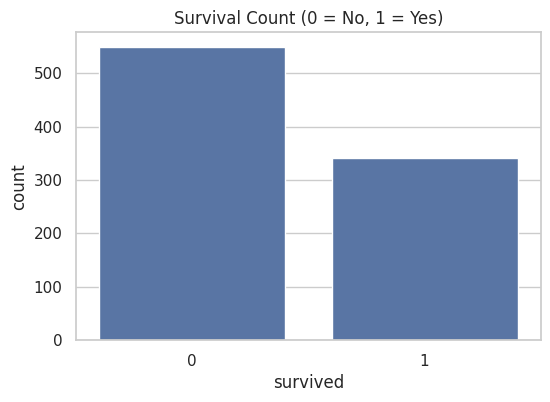

In [ ]:
# 1. Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x="survived", data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

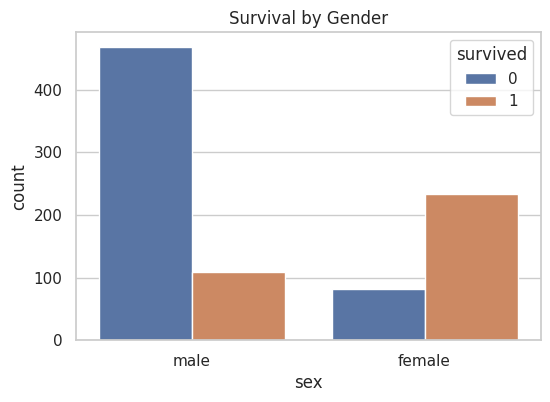

In [ ]:
# 2. Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="survived", data=df)
plt.title("Survival by Gender")
plt.show()


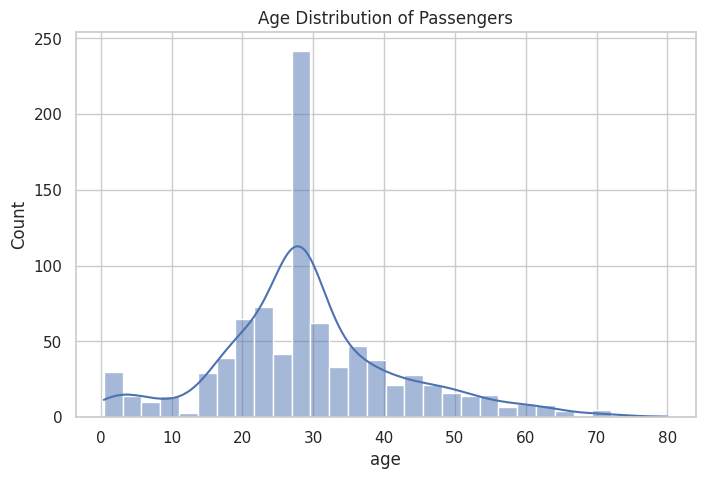

In [ ]:
# 3. Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()

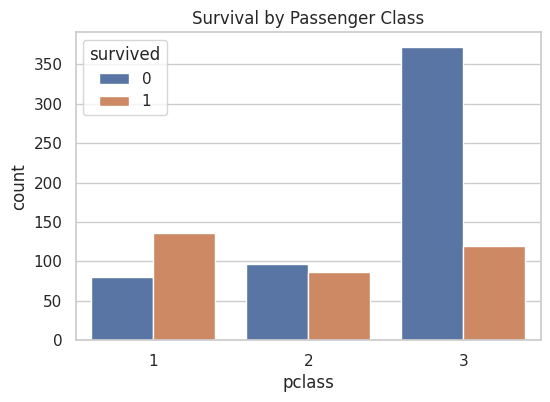

In [ ]:
# 4. Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x="pclass", hue="survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()


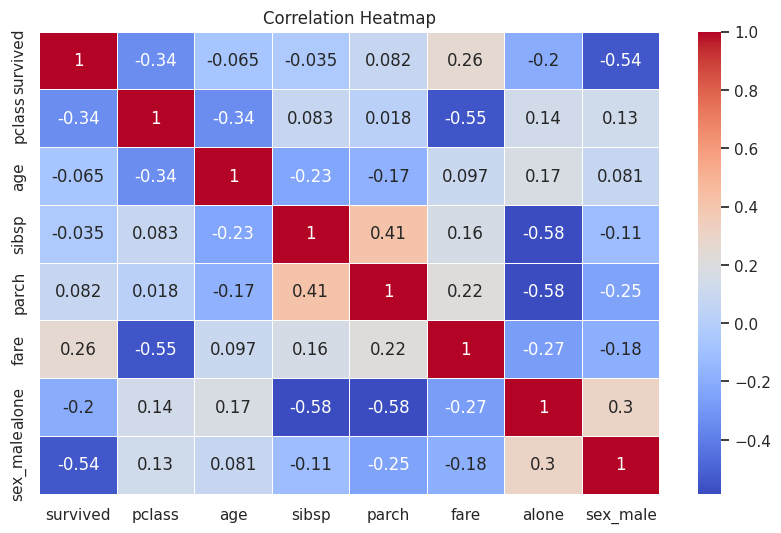

In [ ]:
# 5. Heatmap of Correlation
# Convert 'sex' column to numerical representation using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex'], drop_first=True)

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Key Insights (you can mention these in your README/resume)
# - Females had a higher survival rate.
# - Passengers in 1st class had better chances of survival.
# - Younger passengers had slightly better chances of survival.